In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot
import process_emp as pe
import seaborn as sns
%matplotlib inline
sns.set(font='times new roman')
current_palette = sns.color_palette()
sns.set_palette([current_palette[2],current_palette[0], current_palette[1]])
pd.set_option('display.max_rows', 500)

In [2]:
def gen_frame():
    week_list = range(1,12)
    frame_list = []
    for weeks in week_list:
        frame_list.append(pe.process_emp(weeks,'Riverside_Metro_Area'))
    frame_dict = dict(zip(week_list,frame_list))    
    return frame_dict

In [3]:
rvrace_dict = gen_frame()
rvincome_dict = gen_frame()

In [4]:
#create frame where each row is total of that spatial scale
rvrace_rows = ['Hispanic or Latino (may be of any race)','White alone, not Hispanic','Black alone, not Hispanic',
            'Asian alone, not Hispanic','Two or more races + Other races, not Hispanic',]
# The rows in this dataframe need \\ due to need to escape Mathjax expresssion
rvincome_rows = ['Less than \\$25,000', '\\$25,000 - \\$34,999',
               '\\$35,000 - \\$49,999', '\\$50,000 - \\$74,999', '\\$75,000 - \\$99,999',
               '\\$100,000 - \\$149,999', '\\$150,000 - \\$199,999', '\\$200,000 and above',]
for weeks in rvincome_dict.keys():
    rvincome_dict[weeks] = rvincome_dict[weeks].loc[rvincome_rows]
for weeks in rvrace_dict.keys():
    rvrace_dict[weeks] = rvrace_dict[weeks].loc[rvrace_rows]

In [5]:
rvrace_dframe = pd.DataFrame()
rvincome_dframe = pd.DataFrame()
#create dataframes out of dict of dataframes
for weeks in range(1,12):
    rvrace_dframe = rvrace_dframe.append(rvrace_dict[weeks])
rvrace_dframe.insert(0, 'Week', True)

for weeks in range(1,12):
    rvincome_dframe = rvincome_dframe.append(rvincome_dict[weeks])
rvincome_dframe.insert(0, 'Week', True) 

In [6]:
rvincome_dframe['Week'] = ['1','1','1','1','1','1','1','1',
                           '2','2','2','2','2','2','2','2',
                           '3','3','3','3','3','3','3','3',
                           '4','4','4','4','4','4','4','4',
                           '5','5','5','5','5','5','5','5',
                           '6','6','6','6','6','6','6','6',
                           '7','7','7','7','7','7','7','7',
                           '8','8','8','8','8','8','8','8',
                           '9','9','9','9','9','9','9','9',
                           '10','10','10','10','10','10','10','10',
                           '11','11','11','11','11','11','11','11']

rvrace_dframe['Week'] = ['1','1','1','1','1',
                         '2','2','2','2','2',
                         '3','3','3','3','3',
                         '4','4','4','4','4',
                         '5','5','5','5','5',
                         '6','6','6','6','6',
                         '7','7','7','7','7',
                         '8','8','8','8','8',
                         '9','9','9','9','9',
                         '10','10','10','10','10',
                         '11','11','11','11','11']

In [7]:
race_index = rvrace_dframe[['Week']]
income_index = rvincome_dframe[['Week']]

In [8]:
# create MultiIndex in order to more easily select data for graph
race_index.index.rename('Race',inplace=True)
race_index.reset_index(inplace=True)
race_index = race_index[['Week','Race']]
race_index = pd.MultiIndex.from_frame(race_index)
rvrace_dframe.index = race_index
rvrace_dframe.drop(columns=['Total','Week'],inplace=True)

# Income
income_index.index.rename('Race',inplace=True)
income_index.reset_index(inplace=True)
income_index = income_index[['Week','Race']]
income_index = pd.MultiIndex.from_frame(income_index)
rvincome_dframe.index = income_index
rvincome_dframe.drop(columns=['Total','Week'],inplace=True)

In [9]:
race_list = ['Hispanic or Latino (may be of any race)',
             'White alone, not Hispanic',
             'Black alone, not Hispanic',
             'Asian alone, not Hispanic',
             'Two or more races + Other races, not Hispanic']
income_list = ['Less than \\$25,000',
               '\\$25,000 - \\$34,999',
               '\\$35,000 - \\$49,999',
               '\\$50,000 - \\$74,999',
               '\\$75,000 - \\$99,999',
               '\\$100,000 - \\$149,999',
               '\\$150,000 - \\$199,999',
               '\\$200,000 and above',]

In [10]:
graph_list=[
    '% Household experienced loss of employment income since March 13, 2020',
    '% Household expects loss of employment income in next 4 weeks',
    '% Household did not experience loss of employment income since March 13, 2020',
    '% Household does not expect loss of employment income in next 4 weeks'
]

# Race

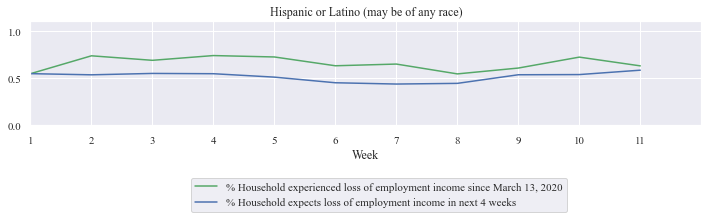

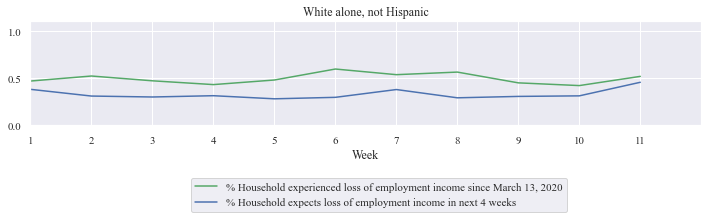

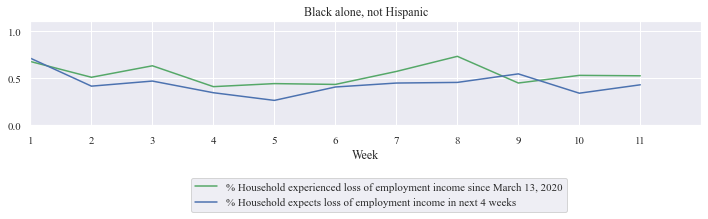

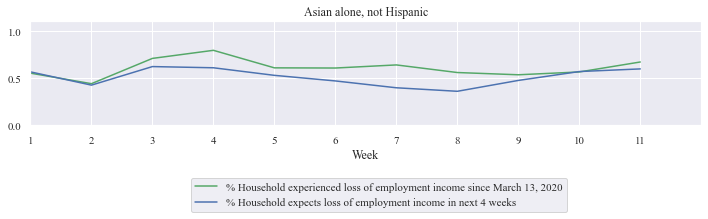

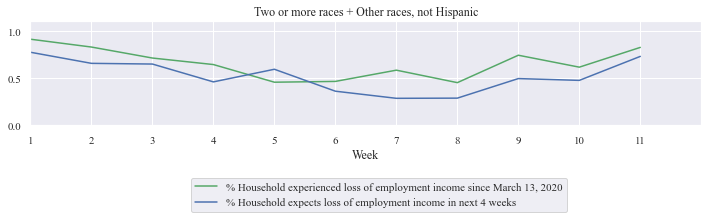

In [11]:
for races in race_list:
    fig, ax = plot.subplots()
    rvrace_dframe.xs(races,level=1)[graph_list[:2]].plot(figsize=(10,4), ylim=(0,1.1), ax=ax)
    ax.set_xlim(xmin=1)
    ax.set_xticks(range(0,12))
    ax.set_xticklabels(range(1,12))
    plot.title(races)
    plot.legend(bbox_to_anchor=(0.8, -0.5), loc='best',
               ncol=1, borderaxespad=0)
    plot.tight_layout()
    plot.savefig(f'../figures/EMP/race/EMP_IncomeLoss_Temporal-{races}',bbox_inches='tight')

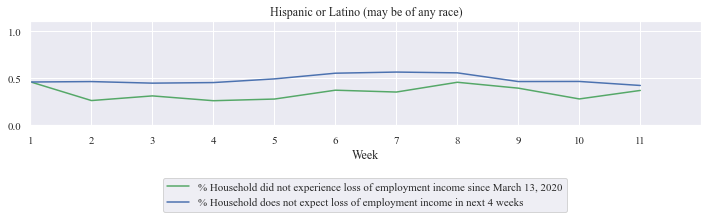

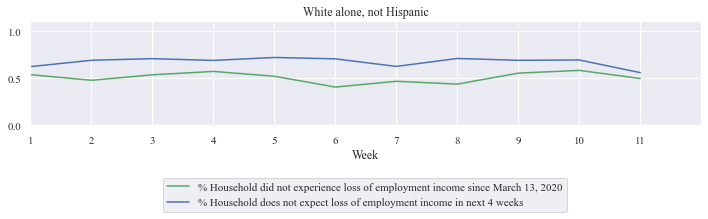

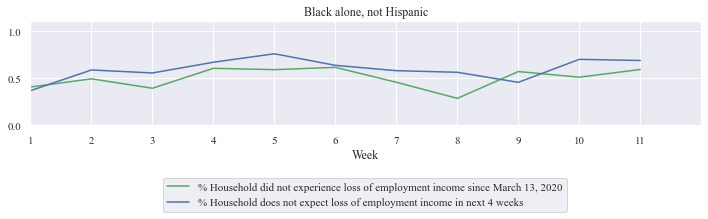

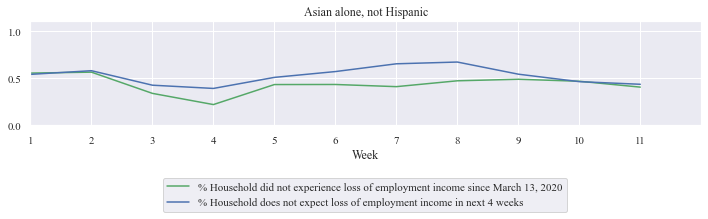

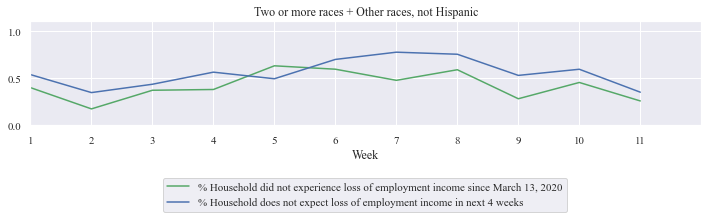

In [12]:
for races in race_list:
    fig, ax = plot.subplots()
    rvrace_dframe.xs(races,level=1)[graph_list[2:]].plot(figsize=(10,4), ylim=(0,1.1), ax=ax)
    ax.set_xlim(xmin=1)
    ax.set_xticks(range(0,12))
    ax.set_xticklabels(range(1,12))
    plot.title(races)
    plot.legend(bbox_to_anchor=(0.8, -0.5), loc='best',
               ncol=1, borderaxespad=0)
    plot.tight_layout()
    plot.savefig(f'../figures/EMP/race/EMP_NoIncomeLoss_Temporal-{races}',bbox_inches='tight')

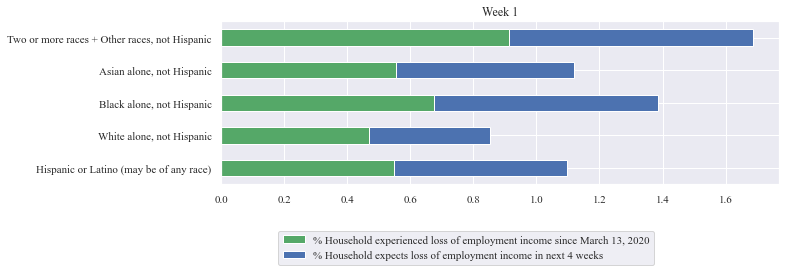

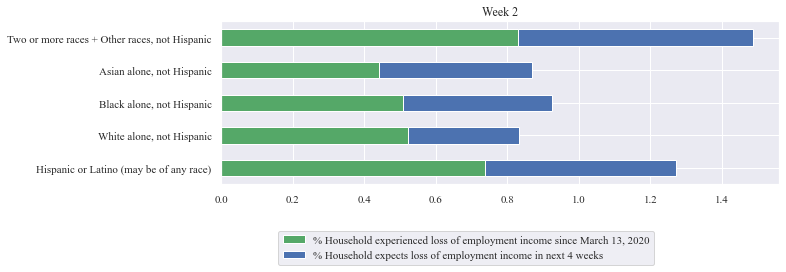

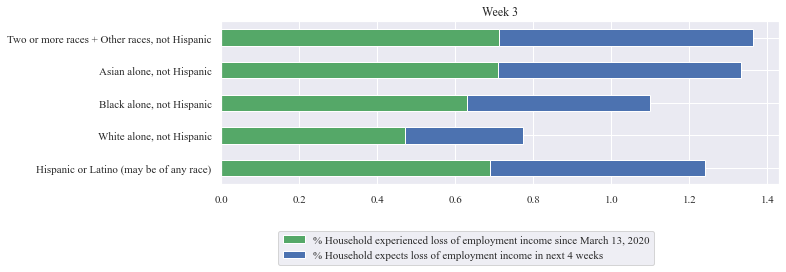

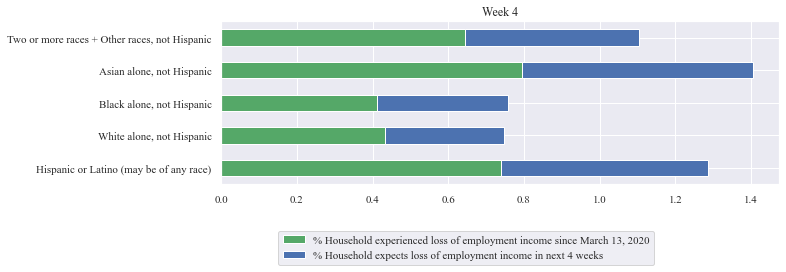

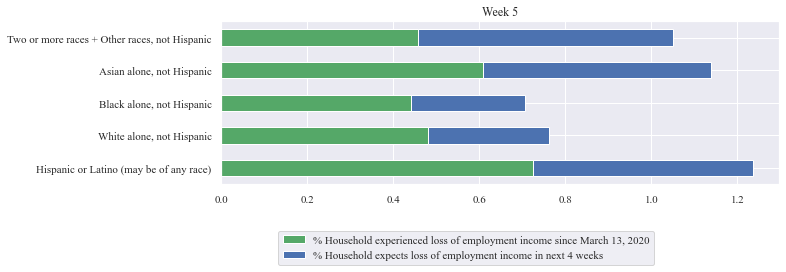

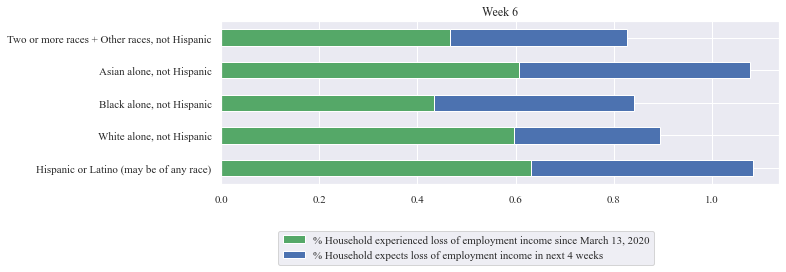

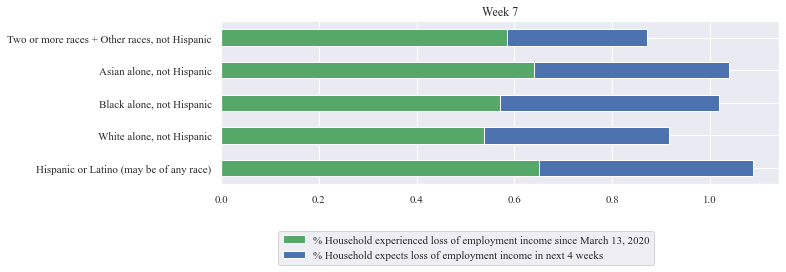

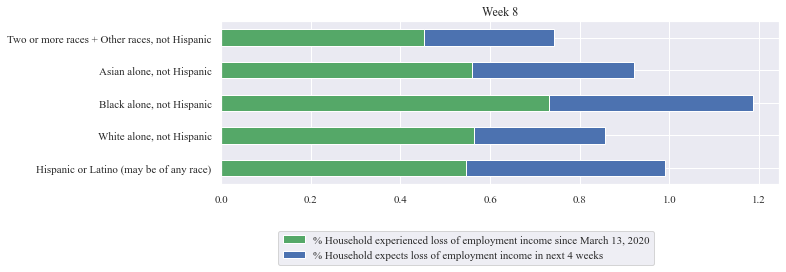

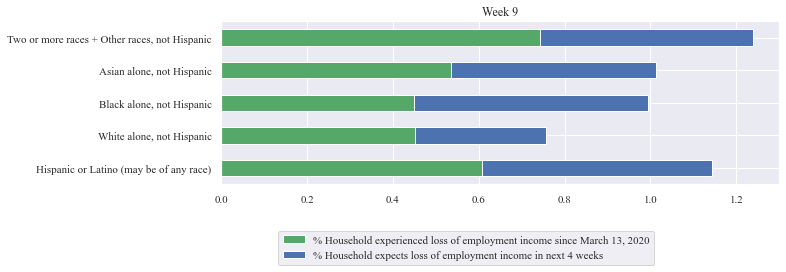

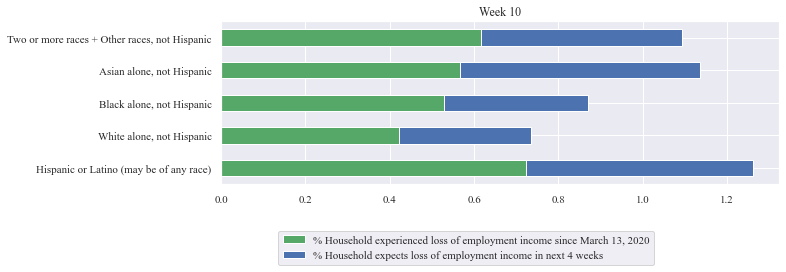

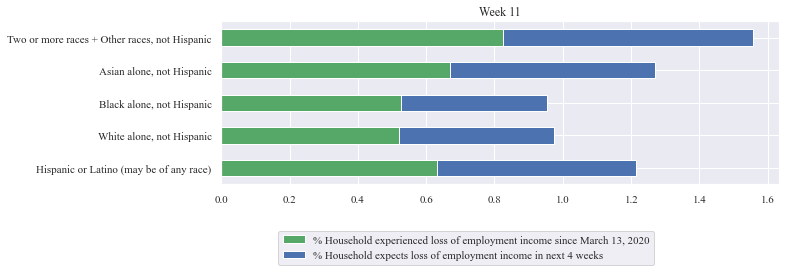

In [13]:
for weeks in rvrace_dict.keys():
    rvrace_dict[weeks][graph_list[:2]].plot.barh(
        stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(.1, -0.5), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')
    plot.savefig(f'../figures/EMP/race/EMP_IncomeLossbyRace-Week{weeks}',bbox_inches='tight')

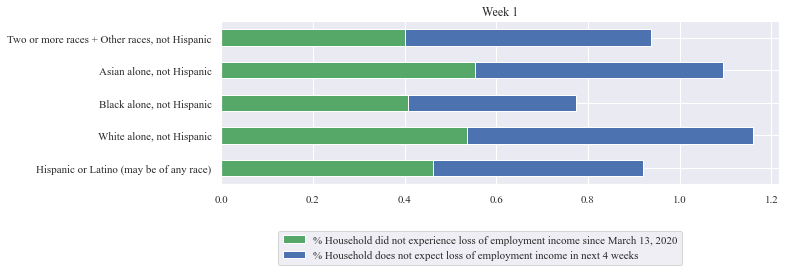

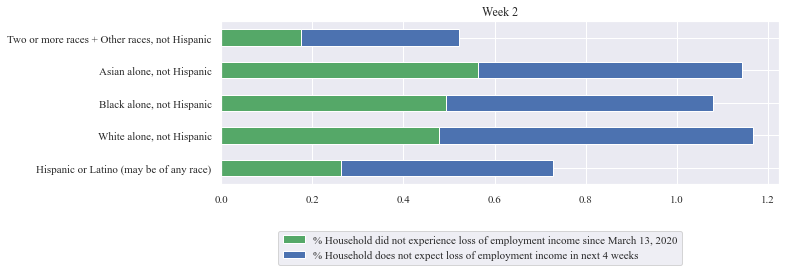

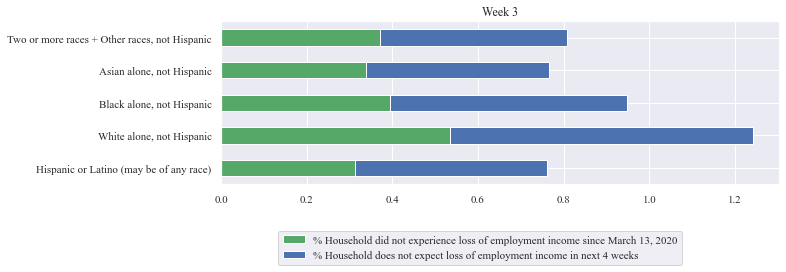

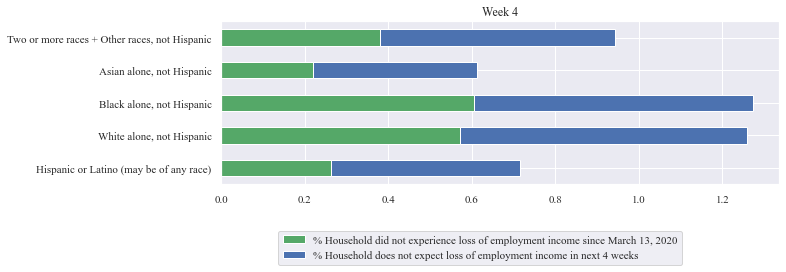

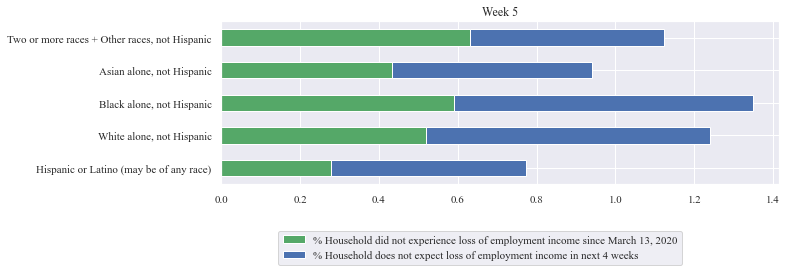

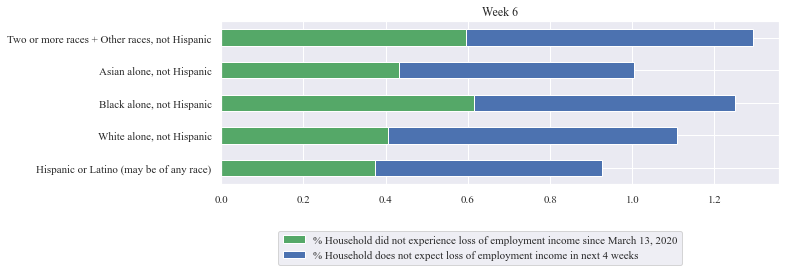

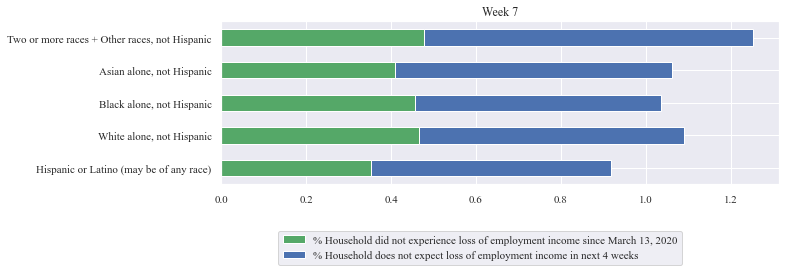

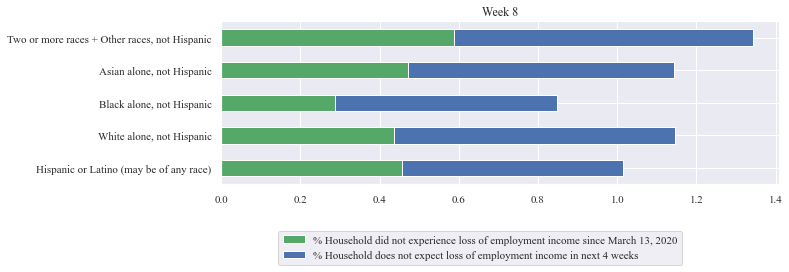

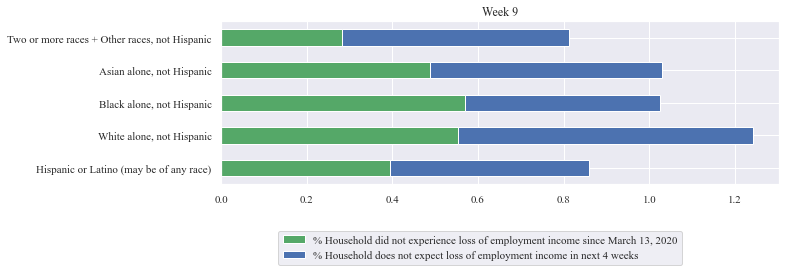

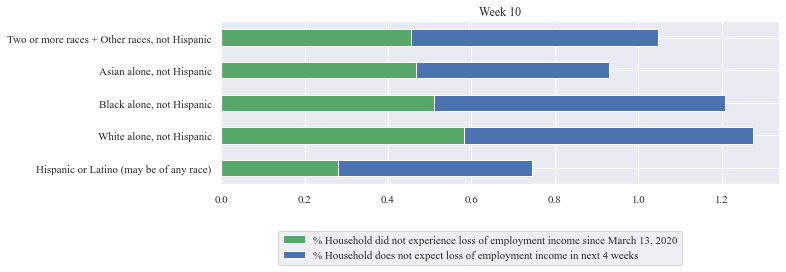

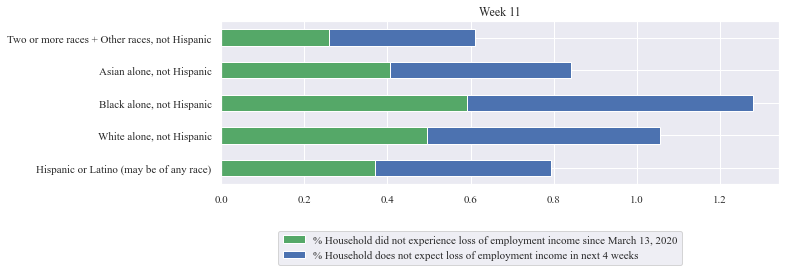

In [14]:
for weeks in rvrace_dict.keys():
    rvrace_dict[weeks][graph_list[2:]].plot.barh(
        stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(.1, -0.5), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')
    plot.savefig(f'../figures/EMP/race/EMP_NoIncomeLossbyRace-Week{weeks}',bbox_inches='tight')

# Income

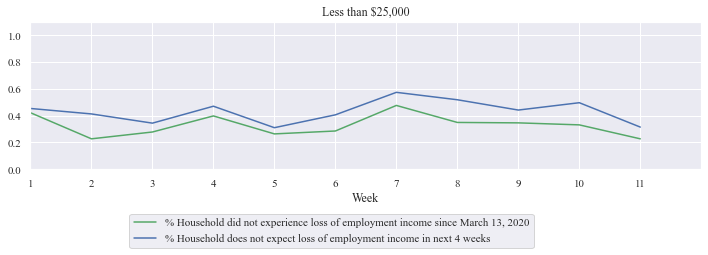

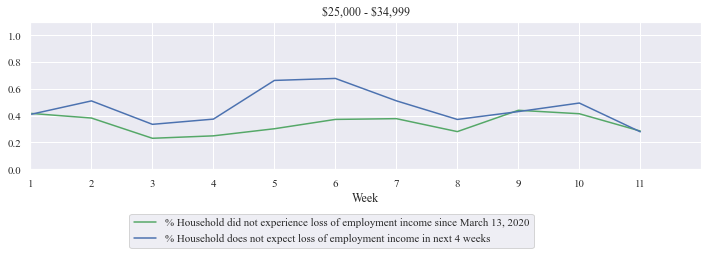

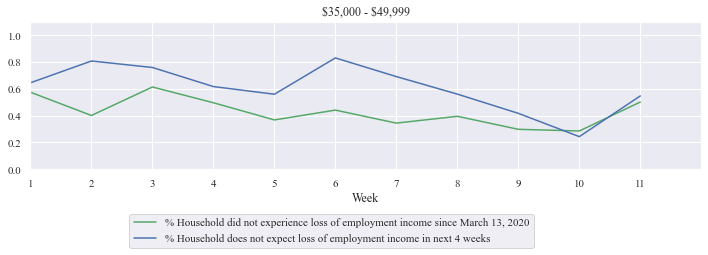

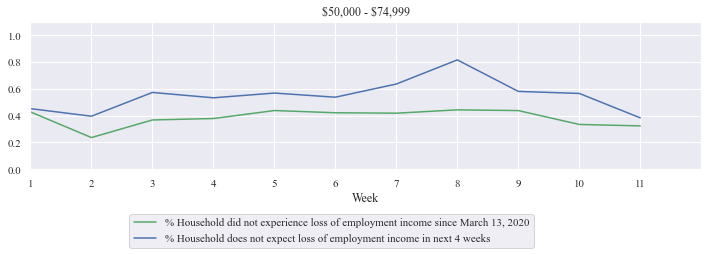

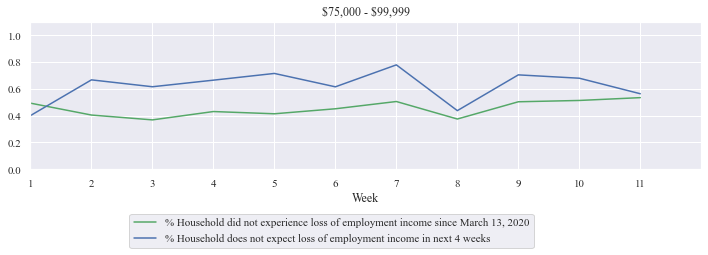

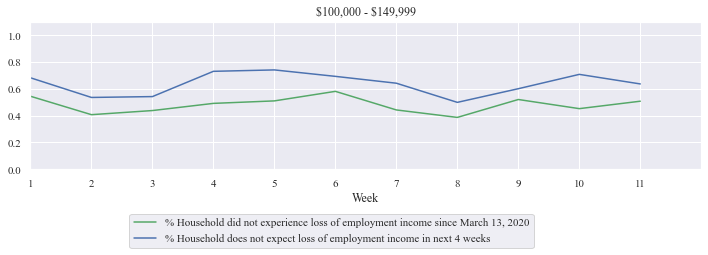

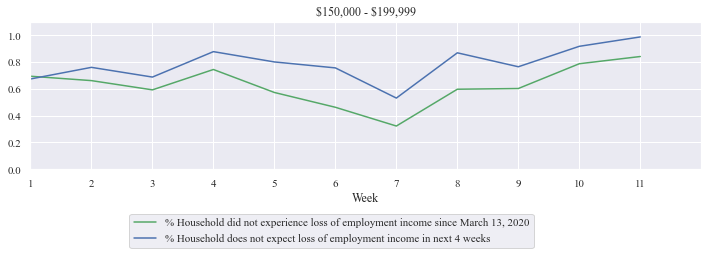

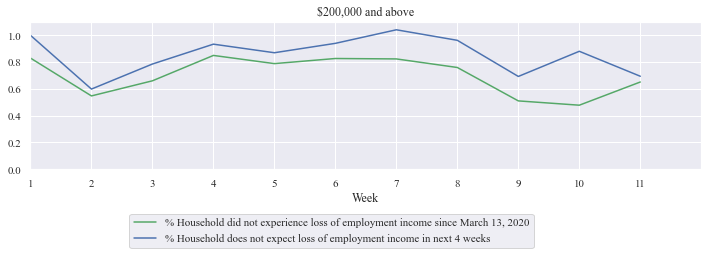

In [15]:
for incomes in income_list:
    f, ax = plot.subplots()
    rvincome_dframe.xs(incomes,level=1)[graph_list[2:]].plot(figsize=(10,4),ylim=(0,1.1), ax=ax)
    plot.title(incomes)
    ax.set_xlim(xmin=1)
    ax.set_xticks(range(0,12))
    ax.set_xticklabels(range(1,12))
    plot.legend(bbox_to_anchor=(0.75, -.3), loc='best',
               ncol=1, borderaxespad=0)
    plot.tight_layout()
    plot.savefig(f'../figures/EMP/income/EMP_NoIncomeLoss_Temporal-{incomes}',bbox_inches='tight')

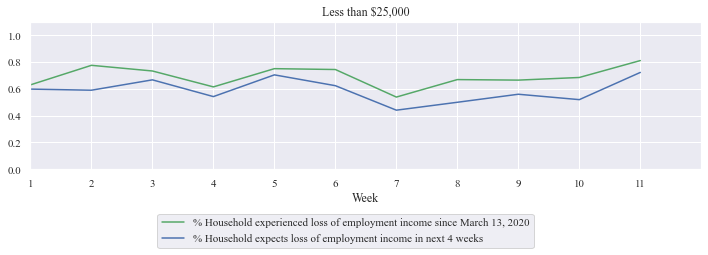

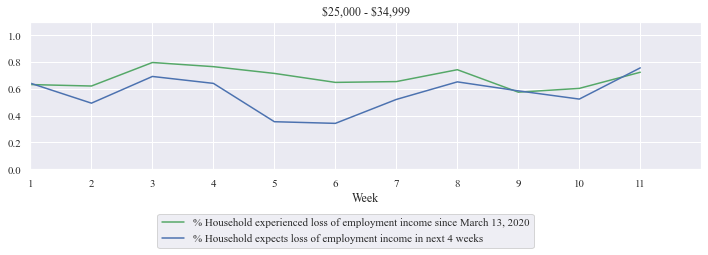

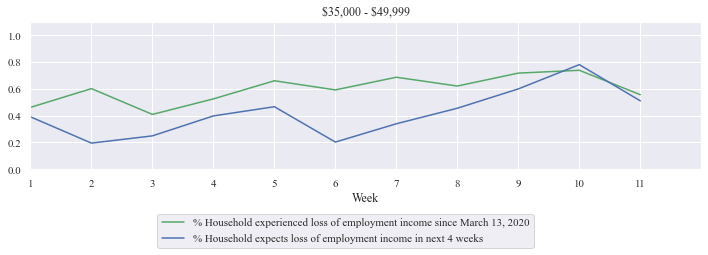

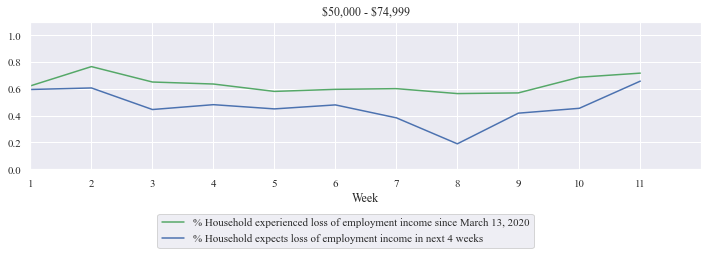

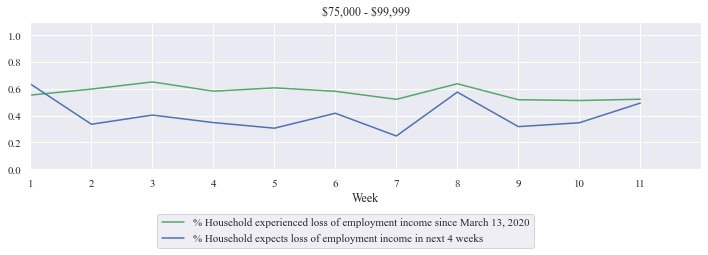

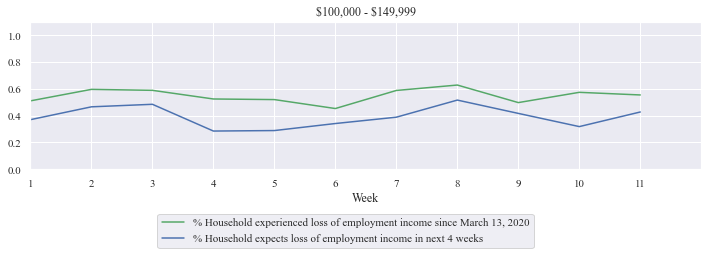

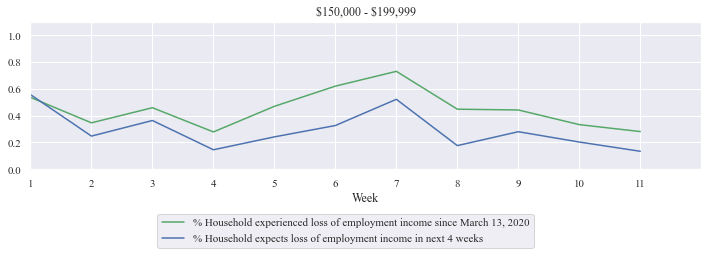

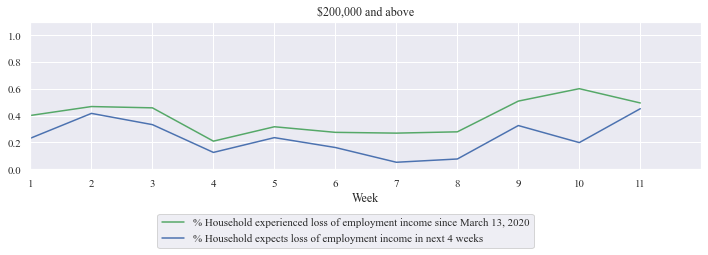

In [16]:
for incomes in income_list:
    f, ax = plot.subplots()
    rvincome_dframe.xs(incomes,level=1)[graph_list[:2]].plot(figsize=(10,4),ylim=(0,1.1), ax=ax)
    plot.title(incomes)
    ax.set_xlim(xmin=1)
    ax.set_xticks(range(0,12))
    ax.set_xticklabels(range(1,12))
    plot.legend(bbox_to_anchor=(0.75, -.3), loc='best',
               ncol=1, borderaxespad=0)
    plot.tight_layout()
    plot.savefig(f'../figures/EMP/income/EMP_IncomeLoss_Temporal-{incomes}',bbox_inches='tight')

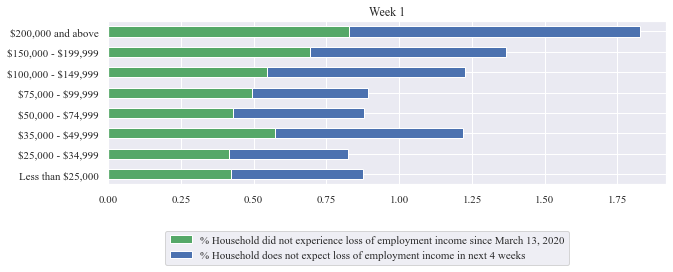

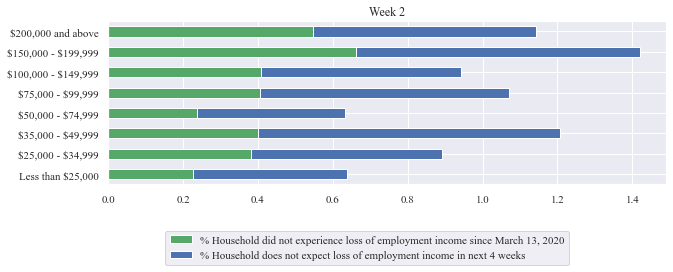

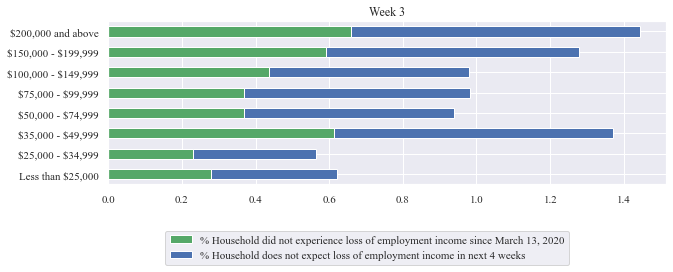

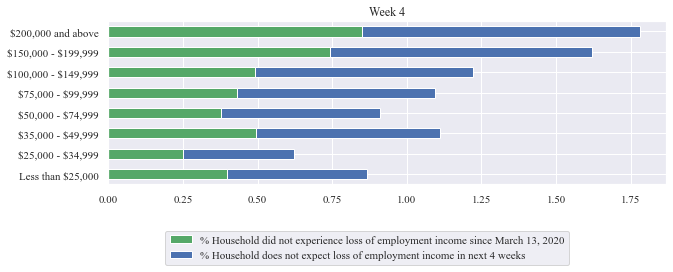

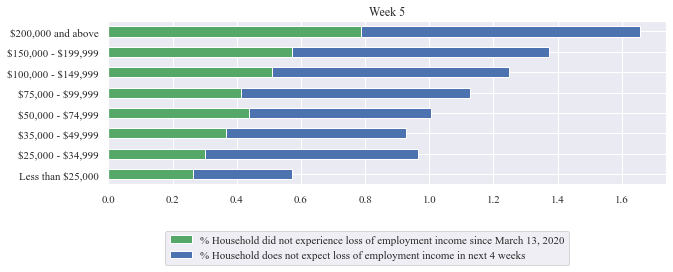

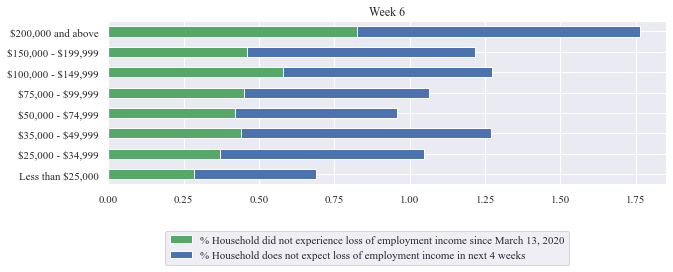

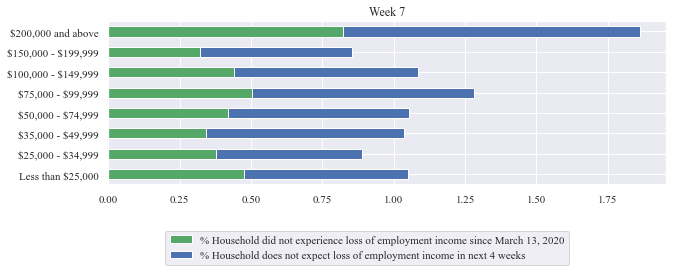

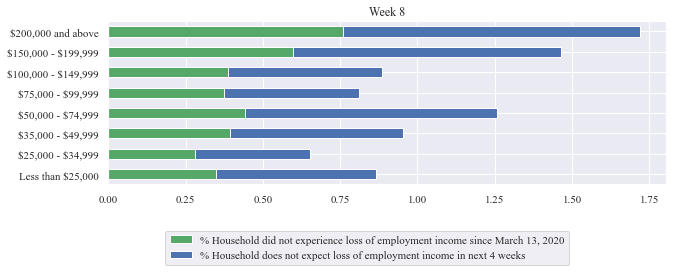

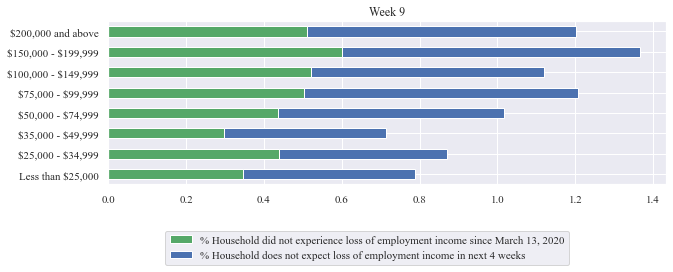

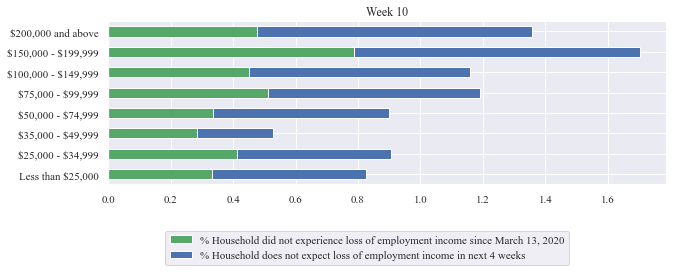

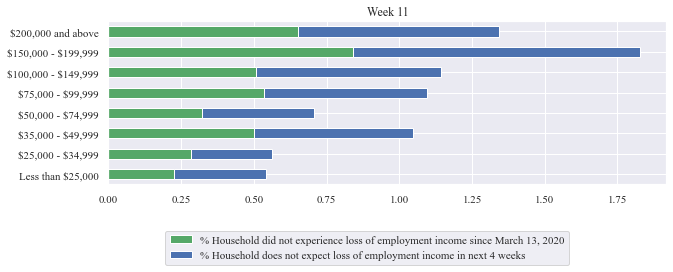

In [17]:
for weeks in rvincome_dict.keys():
    rvincome_dict[weeks][graph_list[2:]].plot.barh(
        stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(.1, -0.5), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')
    plot.savefig(f'../figures/EMP/income/EMP_NoIncomeLossbyIncome-Week{weeks}',bbox_inches='tight')

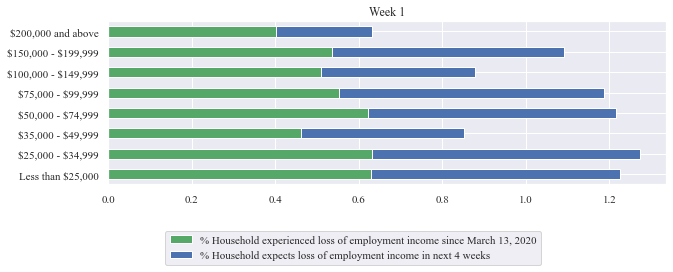

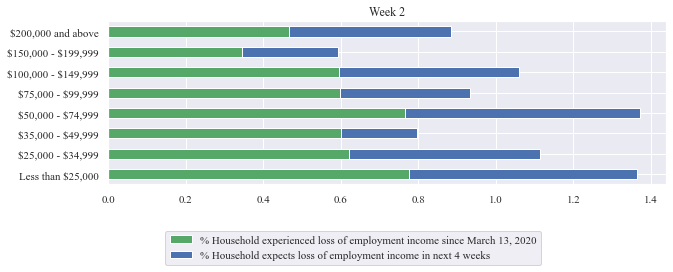

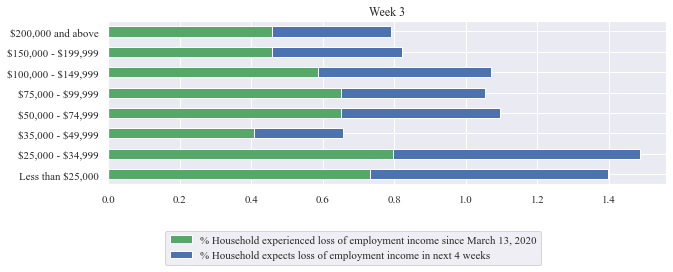

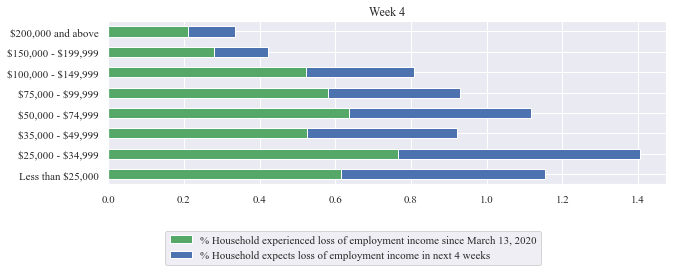

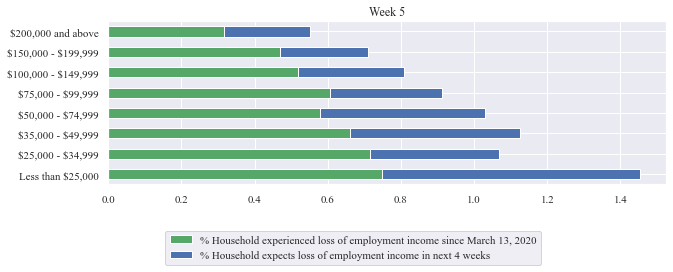

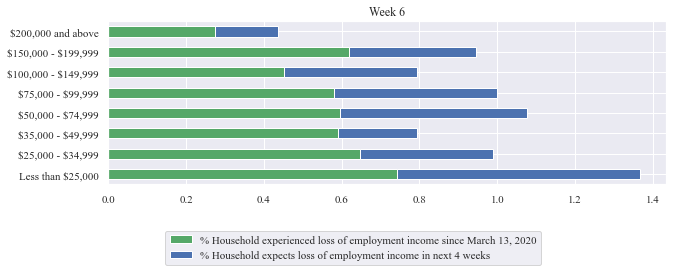

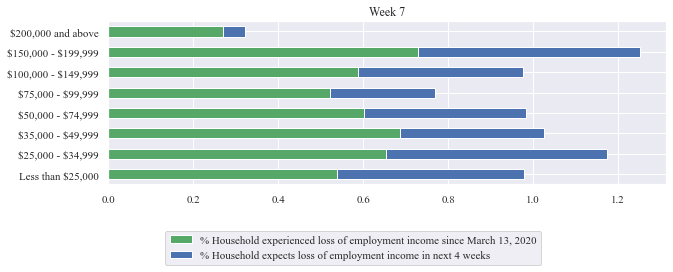

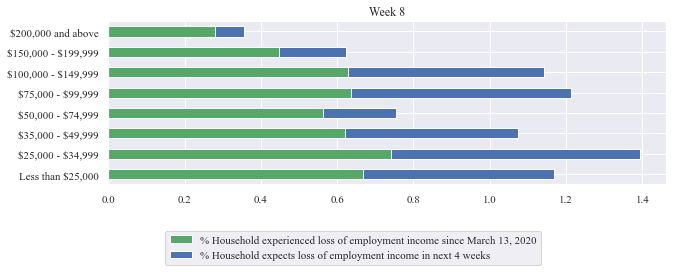

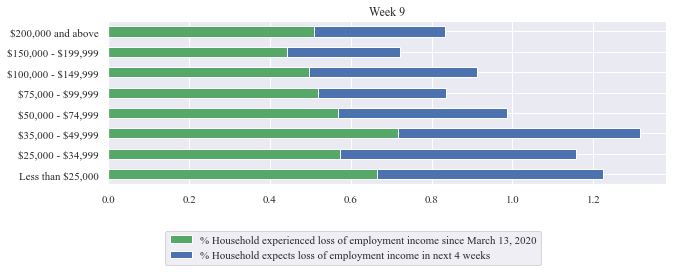

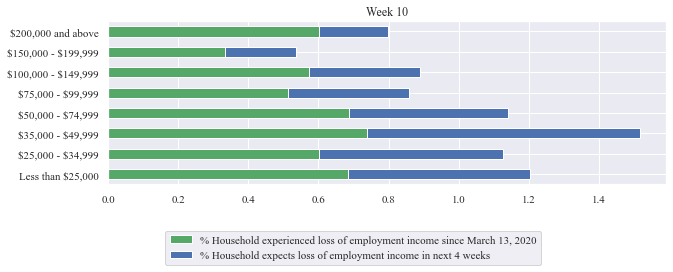

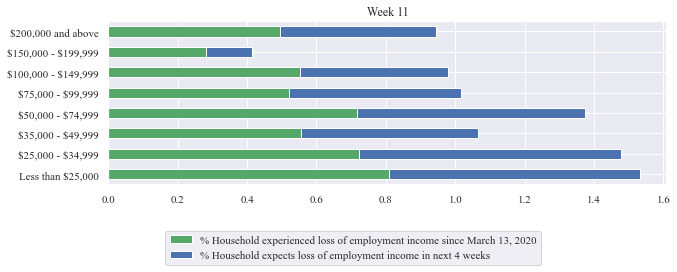

In [18]:
for weeks in rvincome_dict.keys():
    rvincome_dict[weeks][graph_list[:2]].plot.barh(
        stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(.1, -0.5), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')
    plot.savefig(f'../figures/EMP/income/EMP_IncomeLossbyIncome-Week{weeks}',bbox_inches='tight')

### Writing the Dataframes out to CSV

In [19]:
rvincome_dframe.to_csv('../data/processed_data/EMP_IncomeRiverside-Temporal.csv')

In [20]:
rvrace_dframe.to_csv('../data/processed_data/EMP_RaceRiverside-Temporal.csv')